In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure

In [2]:
# Define Path
path = r"C:\Users\18478\OneDrive\Desktop\Career Foundry Data Analytics Course\Career Foundry Machine Learning"

In [3]:
# Import Weather Data Set
climate_scaled =pd.read_pickle(os.path.join(path, 'Data Sets', 'df_weather_prediction_scaled.pkl'))

In [4]:
# Import Pleasant Weather Data
pleasant= pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [5]:
#dropping unrelated station data from main dataset
df_climate_scaled = climate_scaled.drop(columns=['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max','ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean','TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max'])

In [6]:
df_climate_scaled.head()

id      DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0   0  19600101      1           0.660514          -0.02793        0.826097   
1   1  19600102      1           0.244897          -0.02793        0.735760   
2   2  19600103      1           1.076130          -0.02793        1.277781   
3   3  19600104      1          -1.001953          -0.02793        1.458455   
4   4  19600105      1           0.244897          -0.02793        1.729466   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0       -0.001949               -1.101066            -0.265148   
1       -0.001949               -1.058108             1.658760   
2       -0.001949               -1.251420             0.155707   
3       -0.001949               -0.821838            -0.445514   
4       -0.001949               -0.746661            -0.164944   

   BASEL_snow_depth  ...  VALENTIA_cloud_cover  VALENTIA_humidity  \
0         -0.179228  ...             -0.443701           0.761754   
1         -0.179228  ...              0.783085           1.183580   
2         -0.179228  ...              0.783085           1.183580   
3         -0.179228  ...              0.783085           0.480538   
4         -0.179228  ...             -1.670486          -0.363113   

   VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0          -1.299744                  -0.806427               -0.088407   
1          -1.262455                  -1.042055                0.503361   
2          -0.432779                  -1.136306               -0.396127   
3           0.387574                  -1.183432                0.669056   
4           1.729970                  -0.794645               -0.490810   

   VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
0            -0.024706           0.372147           -0.668215   
1            -0.024706          -0.829285           -0.548046   
2            -0.024706          -1.009500           -0.067372   
3            -0.024706          -1.039536           -0.998679   
4            -0.024706           0.672505           -1.509396   

   VALENTIA_temp_min  VALENTIA_temp_max  
0          -0.519743          -0.752237  
1          -0.629054          -0.407141  
2           0.054135          -0.177078  
3          -0.164486          -0.838511  
4          -1.339569          -1.471186  

[5 rows x 150 columns]

In [7]:
#Create an 'X' and y df by dropping the unneeded columns.

X = df_climate_scaled.drop(['DATE', 'MONTH'], axis=1)
y = pleasant.drop(['DATE'],axis=1)

In [8]:
# Split into Train/Test Subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
#converting df to numpy array
X_test = np.array(X_test) 
X_train = np.array(X_train)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-0.4920956  -1.41107749 -0.03095027 ...  1.45475014  1.57581674
   1.16512065]
 [ 1.36049213  1.08186228 -0.58789342 ... -0.0139084  -0.0077553
  -0.00981651]
 [ 1.02803443  0.66637232 -0.866365   ... -2.92125284 -3.22950531
  -2.18774879]
 ...
 [-1.01183429  1.08186228 -0.03095027 ... -0.07385364  0.48369809
  -0.61161358]
 [-0.05505633  0.66637232 -0.03095027 ...  0.55557144  0.42909216
   0.64929458]
 [ 1.4970669  -1.41107749 -1.14483657 ... -0.0139084  -0.0077553
  -0.00981651]]


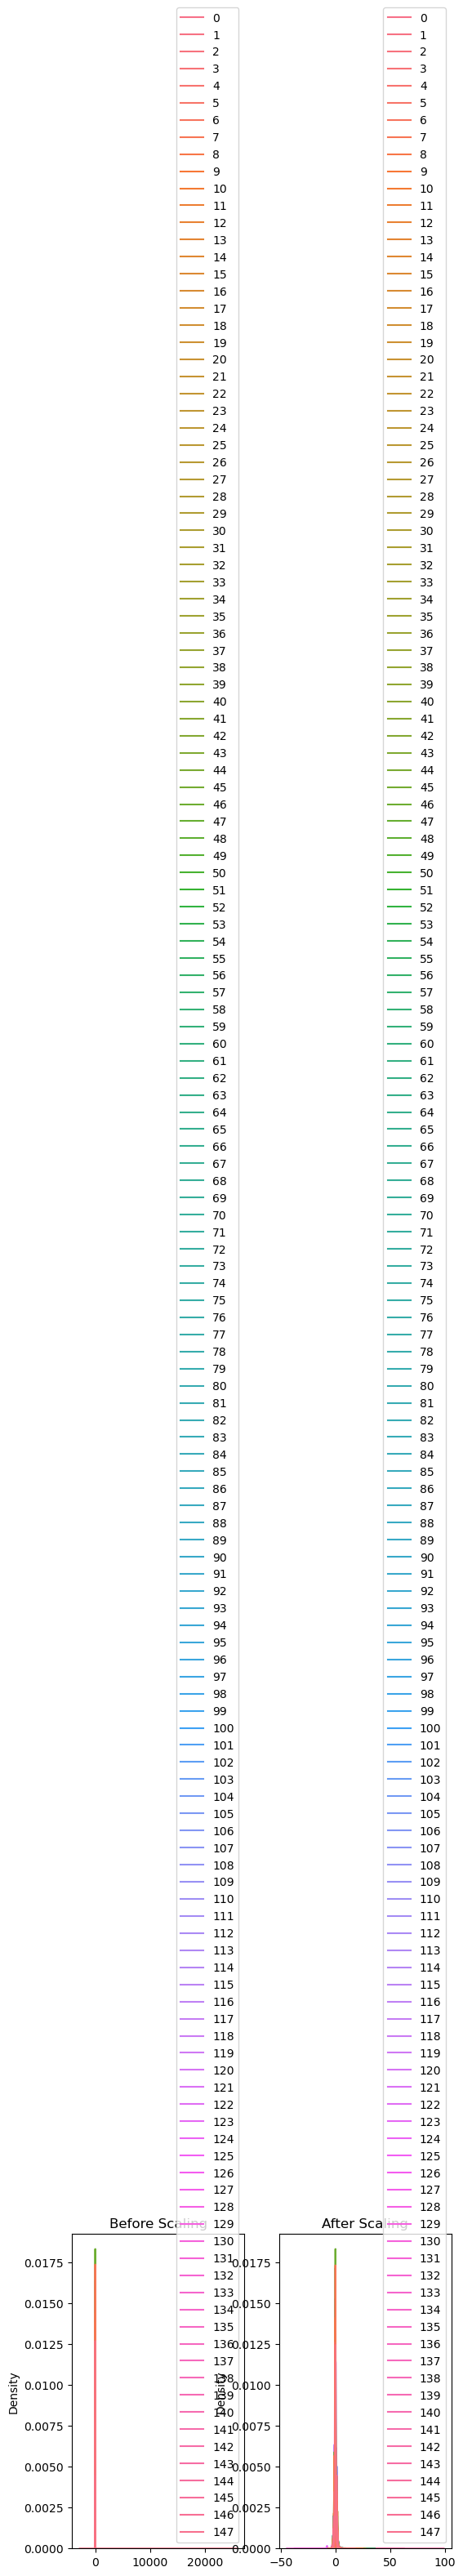

In [11]:
#Show scaling differences ##turn off legend
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train, ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_sc, ax=ax2)

plt.show()

In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [20]:
#testing ANN accuracy
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.40001161980013944
0.39996514464970373


In [21]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5, 8), max_iter=800, tol=0.00001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5, 8), max_iter=800, tol=1e-05)

In [22]:
#testing ANN accuracy
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.40460144085521726
0.40432206343673754


In [23]:
mlp = MLPClassifier(hidden_layer_sizes=(38, 18, 28), max_iter=2800, tol=0.00000000001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(38, 18, 28), max_iter=2800, tol=1e-11)

In [24]:
#testing ANN accuracy
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.417789914013479
0.4224468455907982


In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(40, 20, 30), max_iter=2800, tol=0.00000000001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(40, 20, 30), max_iter=2800, tol=1e-11)

In [32]:
#testing ANN accuracy
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.4322565651870788
0.4351690484489369


In [33]:
locations = list({x.split("_")[0] for x in df_climate_scaled.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA',
 'id']

In [34]:
locations.remove('id')
print(locations)

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


C:\Users\18478\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


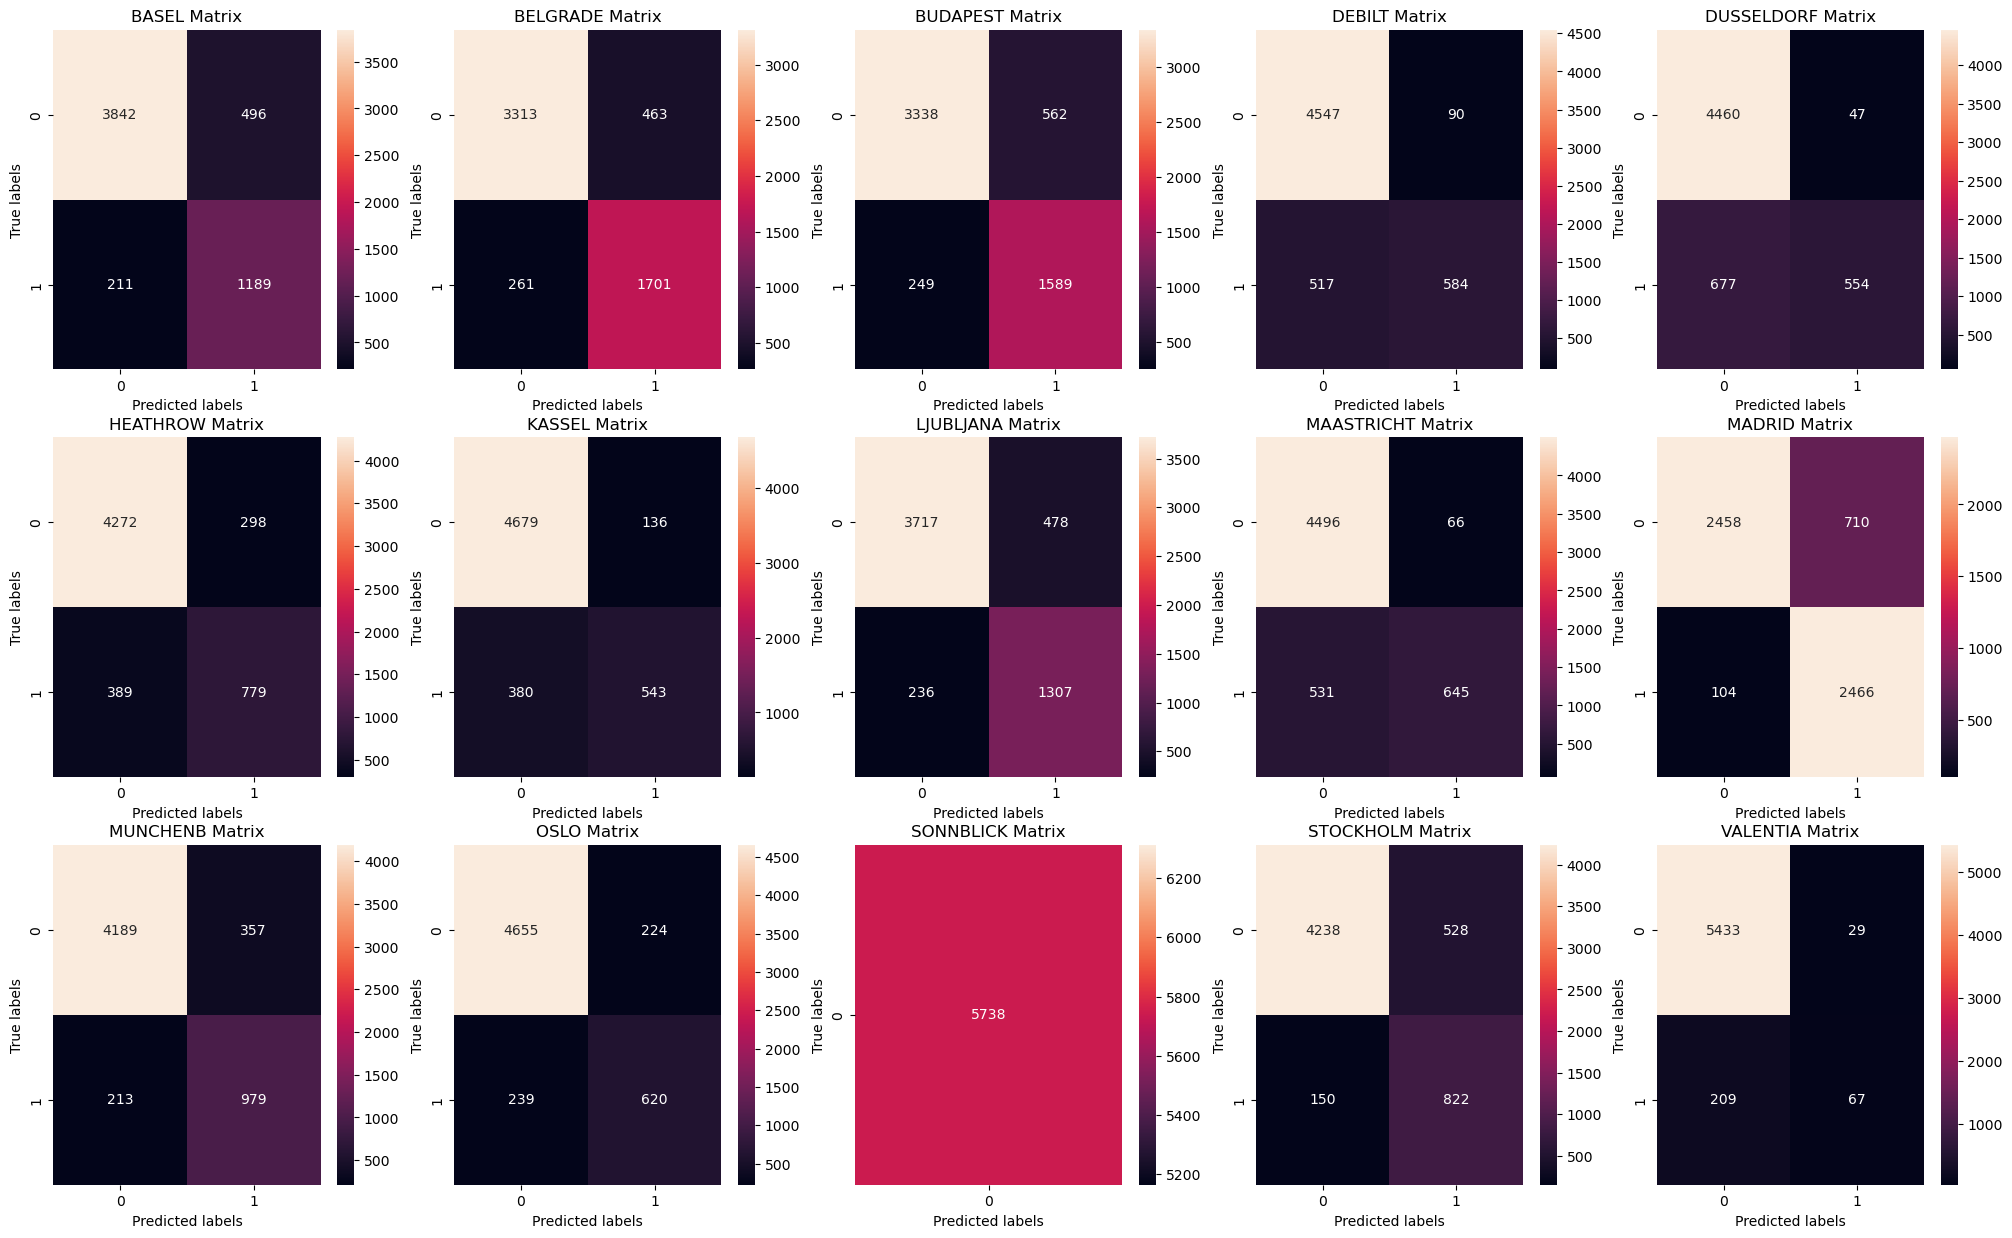

In [35]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1